In [72]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/nicolas/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['source']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [103]:
path = "/home/nicolas/Documentos/Universidad/Sources/CUDA/CUDAMCFL/3cyls/"
filename = "3Dbulk-3cyls-z4"
bulkDesc = np.genfromtxt(path + filename)

In [104]:
grid_size = 5
thickness = 5
size_lat = 4*thickness*grid_size
size_depth = thickness*grid_size
bulkDesc = bulkDesc.reshape(size_depth, size_lat, size_lat).T
print(bulkDesc.shape)

(100, 100, 25)


In [105]:
source = (-4, 0, 1)

dbulk = np.empty(3, dtype=float)
source_int = np.empty(3, dtype=int)

dbulk[0] = 4*thickness/bulkDesc.shape[0]
dbulk[1] = 4*thickness/bulkDesc.shape[1]
dbulk[2] = thickness/bulkDesc.shape[2]
print (dbulk)

source_int[0]=int(round((source[0]+2*thickness)/dbulk[0]))
source_int[1]=int(round((source[1]+2*thickness)/dbulk[1]))   
source_int[2]=int(round((source[2])/dbulk[2]))
print (source_int)

#bulkDesc[source_int[0], source_int[1], source_int[2]]= 4

[ 0.2  0.2  0.2]
[30 50  5]


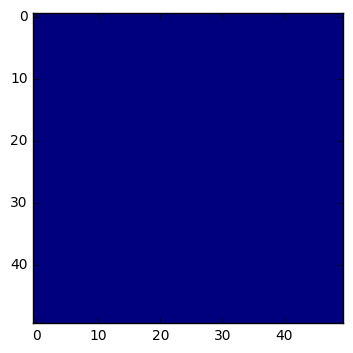

In [106]:
plt.imshow(bulkDesc[25:75,25:75,5].T,vmin=1)
plt.savefig(path + filename + "_z-cut.png", dpi=300)

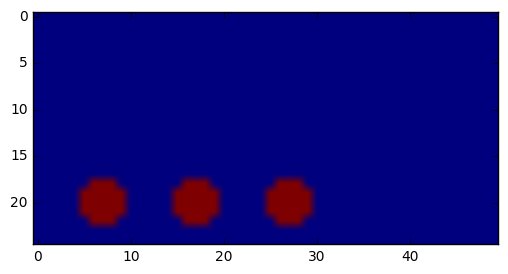

In [107]:
plt.imshow(bulkDesc[25:75,50,:].T,vmin=1)
plt.savefig(path + filename + "_y-cut.png", dpi=300)